In [ ]:
import tensorflow as tf
import numpy as np
!wget https://github.com/luv22/Dataset/blob/main/face_landmarks_cleaned.zip?raw=true -O data.zip
!unzip data.zip


--2020-11-08 11:08:19--  https://github.com/luv22/Dataset/blob/main/face_landmarks_cleaned.zip?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/luv22/Dataset/raw/main/face_landmarks_cleaned.zip [following]
--2020-11-08 11:08:19--  https://github.com/luv22/Dataset/raw/main/face_landmarks_cleaned.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/luv22/Dataset/main/face_landmarks_cleaned.zip [following]
--2020-11-08 11:08:19--  https://raw.githubusercontent.com/luv22/Dataset/main/face_landmarks_cleaned.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent

In [ ]:
x_train = np.load( "face_landmarks_cleaned/x_train.npy" ) / 255
y_train = np.load( "face_landmarks_cleaned/y_train.npy" ) / 96
x_test = np.load( "face_landmarks_cleaned/x_test.npy" ) / 255
y_test = np.load( "face_landmarks_cleaned/y_test.npy" ) / 96

y_train = np.reshape( y_train , ( -1 , 1 , 1 , 30 ))
y_test = np.reshape( y_test , ( -1 , 1 , 1 , 30 ))

In [ ]:
x_train

array([[[[0.44313725],
         [0.46666667],
         [0.51764706],
         ...,
         [0.43137255],
         [0.58431373],
         [0.69411765]],

        [[0.36470588],
         [0.42352941],
         [0.40784314],
         ...,
         [0.4627451 ],
         [0.60784314],
         [0.7372549 ]],

        [[0.35686275],
         [0.39215686],
         [0.4       ],
         ...,
         [0.4627451 ],
         [0.56078431],
         [0.68627451]],

        ...,

        [[0.46666667],
         [0.48235294],
         [0.4745098 ],
         ...,
         [0.41960784],
         [0.41568627],
         [0.47843137]],

        [[0.48235294],
         [0.44705882],
         [0.49411765],
         ...,
         [0.42352941],
         [0.41176471],
         [0.44313725]],

        [[0.60784314],
         [0.52156863],
         [0.49803922],
         ...,
         [0.41960784],
         [0.41568627],
         [0.43529412]]],


       [[[0.54509804],
         [0.54117647],
         [0.54

In [ ]:
model_layers = [ 
    tf.keras.layers.SeparableConv2D( 128 , input_shape=( 96 , 96 , 1 ) , kernel_size=( 5 , 5 ) , strides=1 ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation( 'relu' ) ,
    tf.keras.layers.SeparableConv2D( 128 , kernel_size=( 5 , 5 ) , strides=1 ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation( 'relu' ) ,
    
    tf.keras.layers.SeparableConv2D( 128 , kernel_size=( 5 , 5 ) , strides=1 , activation='relu' ),
    tf.keras.layers.SeparableConv2D( 128 , kernel_size=( 5 , 5 ) , strides=1 , activation='relu' ),

    tf.keras.layers.SeparableConv2D( 128 , kernel_size=( 5 , 5 ) , strides=1 ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation( 'relu' ) ,
    tf.keras.layers.SeparableConv2D( 128 , kernel_size=( 5 , 5 ) , strides=1 ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation( 'relu' ) ,

    tf.keras.layers.SeparableConv2D( 128 , kernel_size=( 5 , 5 ) , strides=1 , activation='relu' ),
    tf.keras.layers.SeparableConv2D( 128 , kernel_size=( 5 , 5 ) , strides=1 , activation='relu' ),

    tf.keras.layers.SeparableConv2D( 128 , kernel_size=( 5 , 5 ) , strides=1 ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation( 'relu' ) ,
    tf.keras.layers.SeparableConv2D( 128 , kernel_size=( 5 , 5 ) , strides=1 ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation( 'relu' ) ,
    
    tf.keras.layers.SeparableConv2D( 64 , kernel_size=( 5 , 5 ) , strides=1 , activation='relu' ),
    tf.keras.layers.SeparableConv2D( 64 , kernel_size=( 5 , 5 ) , strides=1 , activation='relu' ),

    tf.keras.layers.SeparableConv2D( 64 , kernel_size=( 5 , 5 ) , strides=1),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation( 'relu' ) ,
    tf.keras.layers.SeparableConv2D( 64 , kernel_size=( 5 , 5 ) , strides=1),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation( 'relu' ) ,

    tf.keras.layers.SeparableConv2D( 64 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.SeparableConv2D( 64 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),

    tf.keras.layers.SeparableConv2D( 64 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.SeparableConv2D( 64 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),

    tf.keras.layers.SeparableConv2D( 64 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.SeparableConv2D( 64 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),

    tf.keras.layers.SeparableConv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.SeparableConv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),

    tf.keras.layers.SeparableConv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.SeparableConv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),

    tf.keras.layers.SeparableConv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.SeparableConv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),

    tf.keras.layers.SeparableConv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.SeparableConv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),

    tf.keras.layers.SeparableConv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.SeparableConv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    
    tf.keras.layers.SeparableConv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.SeparableConv2D( 32 , kernel_size=( 2 , 2 ) , strides=1 , activation='relu' ),

    tf.keras.layers.SeparableConv2D( 30 , kernel_size=( 2 , 2 ) , strides=1 , activation='relu' ),
    tf.keras.layers.SeparableConv2D( 30 , kernel_size=( 2 , 2 ) , strides=1 , activation='relu' ),
    tf.keras.layers.SeparableConv2D( 30 , kernel_size=( 2 , 2 ) , strides=1 , activation='relu' ),
    tf.keras.layers.SeparableConv2D( 30 , kernel_size=( 2 , 2 ) , strides=1 , activation='sigmoid' ),
]
model = tf.keras.Sequential( model_layers )
model.compile( loss=tf.keras.losses.mean_squared_error , optimizer=tf.keras.optimizers.Adam( lr=0.0001 ) , metrics=[ 'mse' ] )
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d (SeparableC (None, 92, 92, 128)       281       
_________________________________________________________________
batch_normalization (BatchNo (None, 92, 92, 128)       512       
_________________________________________________________________
activation (Activation)      (None, 92, 92, 128)       0         
_________________________________________________________________
separable_conv2d_1 (Separabl (None, 88, 88, 128)       19712     
_________________________________________________________________
batch_normalization_1 (Batch (None, 88, 88, 128)       512       
_________________________________________________________________
activation_1 (Activation)    (None, 88, 88, 128)       0         
_________________________________________________________________
separable_conv2d_2 (Separabl (None, 84, 84, 128)       1

In [ ]:
model.fit( x_train , y_train , epochs=25 , batch_size=50 , validation_data=( x_test , y_test ) )


Epoch 1/25
30/30 [==============================] - 30s 1s/step - loss: 0.0384 - mse: 0.0384 - val_loss: 0.0382 - val_mse: 0.0382
Epoch 2/25
30/30 [==============================] - 28s 942ms/step - loss: 0.0381 - mse: 0.0381 - val_loss: 0.0379 - val_mse: 0.0379
Epoch 3/25
30/30 [==============================] - 29s 981ms/step - loss: 0.0378 - mse: 0.0378 - val_loss: 0.0376 - val_mse: 0.0376
Epoch 4/25
30/30 [==============================] - 30s 1s/step - loss: 0.0375 - mse: 0.0375 - val_loss: 0.0374 - val_mse: 0.0374
Epoch 5/25
30/30 [==============================] - 30s 986ms/step - loss: 0.0372 - mse: 0.0372 - val_loss: 0.0370 - val_mse: 0.0370
Epoch 6/25
30/30 [==============================] - 30s 989ms/step - loss: 0.0369 - mse: 0.0369 - val_loss: 0.0367 - val_mse: 0.0367
Epoch 7/25
30/30 [==============================] - 30s 997ms/step - loss: 0.0365 - mse: 0.0365 - val_loss: 0.0363 - val_mse: 0.0363
Epoch 8/25
30/30 [==============================] - 30s 989ms/step - loss: 

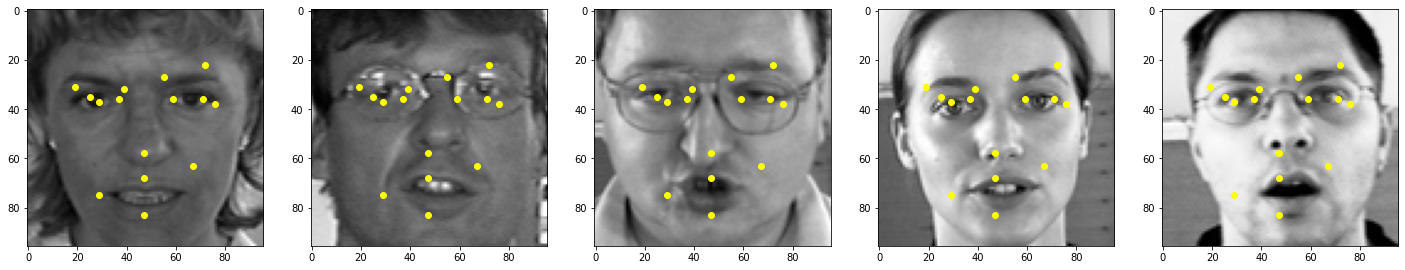

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=( 50 , 50 ))

for i in range( 1 , 6 ):
    sample_image = np.reshape( x_test[i] * 255  , ( 96 , 96 ) ).astype( np.uint8 )
    pred = model.predict( x_test[ i : i +1  ] ) * 96
    pred = pred.astype( np.int32 )
    pred = np.reshape( pred[0 , 0 , 0 ] , ( 15 , 2 ) )
    fig.add_subplot( 1 , 10 , i )
    plt.imshow( sample_image.T , cmap='gray' )
    plt.scatter( pred[ : , 0 ] , pred[ : , 1 ] , c='yellow' )
    
plt.show()
